In [476]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
import seaborn as sb
import pandas as pd
print (np.__version__)
print (sk.__version__)
#print (plt.__version__)
print (sc.__version__)
print (sb.__version__)
print (pd.__version__)

1.20.3
0.24.2
1.7.1
0.11.2
1.3.4


In [477]:
data=pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [478]:
print(data.shape)
display(data.info(),data.describe())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


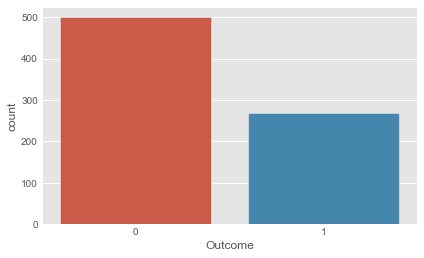

In [479]:
print(data['Outcome'].value_counts())
sb.countplot(x='Outcome',data=data)
print(data.columns)

In [480]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [481]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [482]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [483]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [484]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

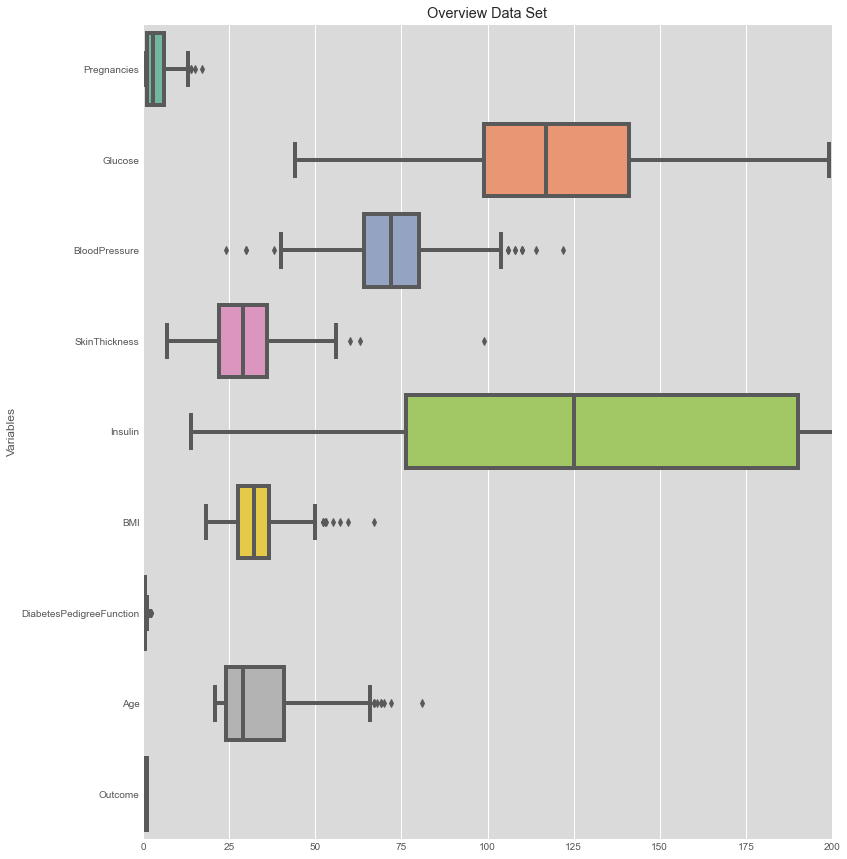

In [485]:
plt.style.use('ggplot')  

fig,ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#dadada')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sb.boxplot(data = data, orient = 'h', palette = 'Set2')

<AxesSubplot:>

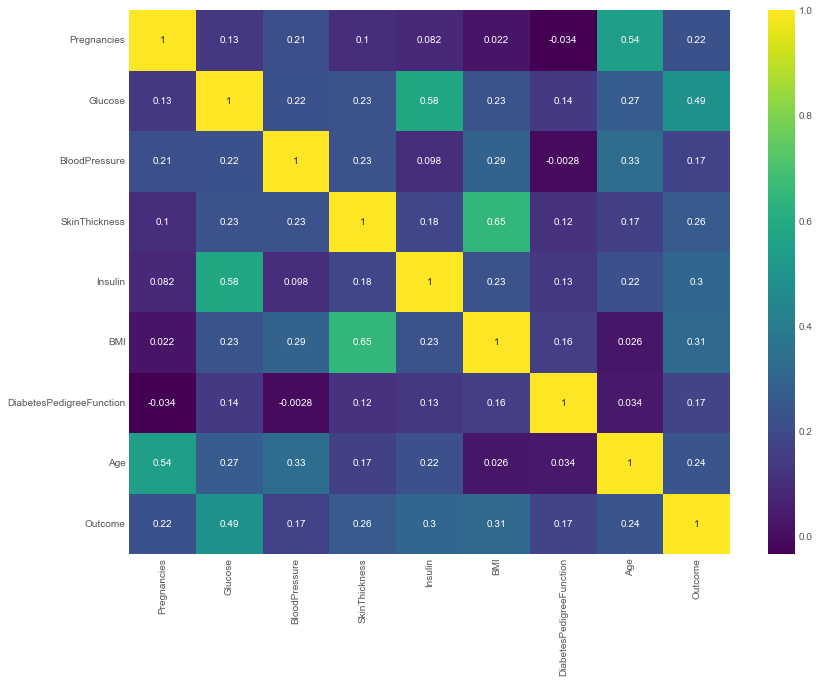

In [486]:
plt.figure(figsize=(12,10))
sb.heatmap(data.corr(method='pearson'),annot=True,cmap='viridis')


In [487]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [488]:
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
1,4.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0


In [489]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [490]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

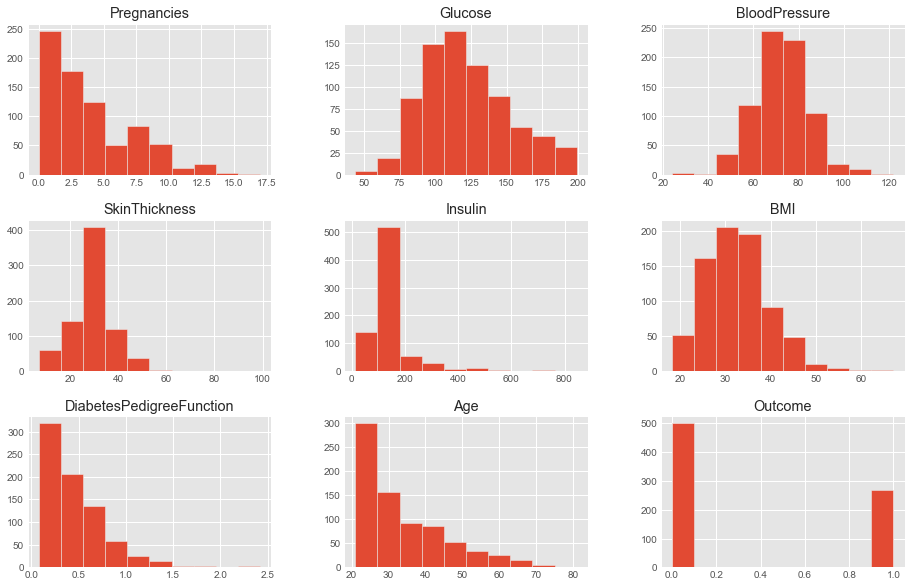

In [491]:
data.hist(figsize=(14,10))
plt.show()

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome'>

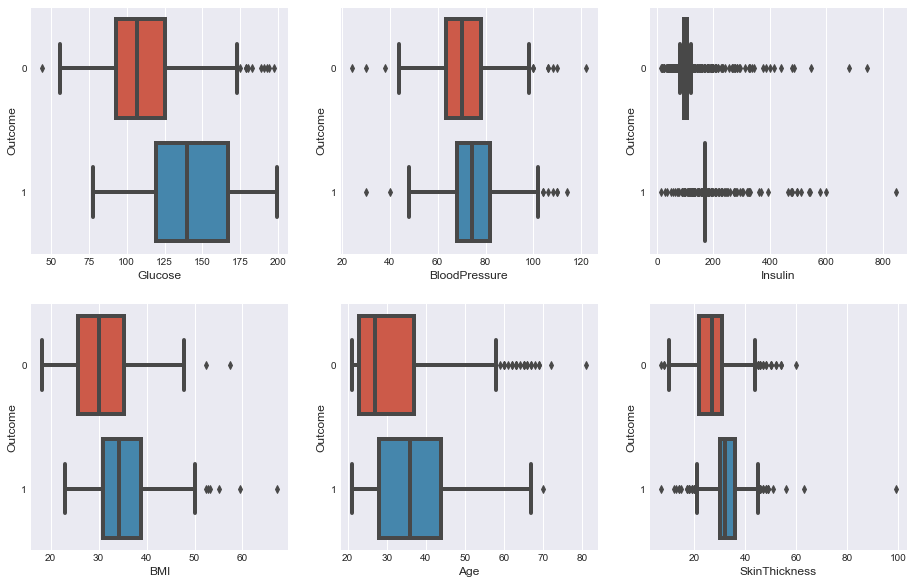

In [492]:
plt.figure(figsize=(14,10))
sb.set_style(style='darkgrid')
plt.subplot(2,3,1)
sb.boxplot(x='Glucose',y='Outcome',data=data,orient='h')
plt.subplot(2,3,2)
sb.boxplot(x='BloodPressure',y='Outcome',data=data,orient='h')
plt.subplot(2,3,3)
sb.boxplot(x='Insulin',y='Outcome',data=data,orient='h')
plt.subplot(2,3,4)
sb.boxplot(x='BMI',y='Outcome',data=data,orient='h')
plt.subplot(2,3,5)
sb.boxplot(x='Age',y='Outcome',data=data,orient='h')
plt.subplot(2,3,6)
sb.boxplot(x='SkinThickness',y='Outcome',data=data,orient='h')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

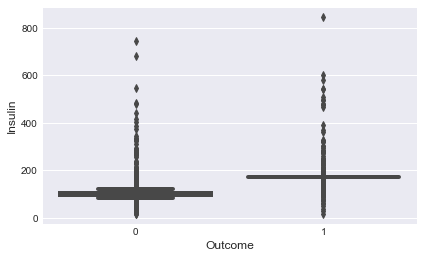

In [493]:
sb.boxplot(x='Outcome',y='Insulin',data=data)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

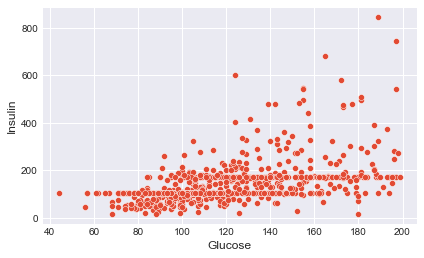

In [494]:
sb.scatterplot(x='Glucose', y= 'Insulin', data=data)

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

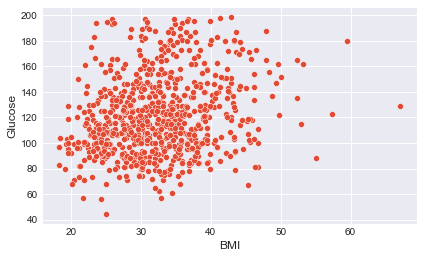

In [495]:
sb.scatterplot(x='BMI', y= 'Glucose', data=data)

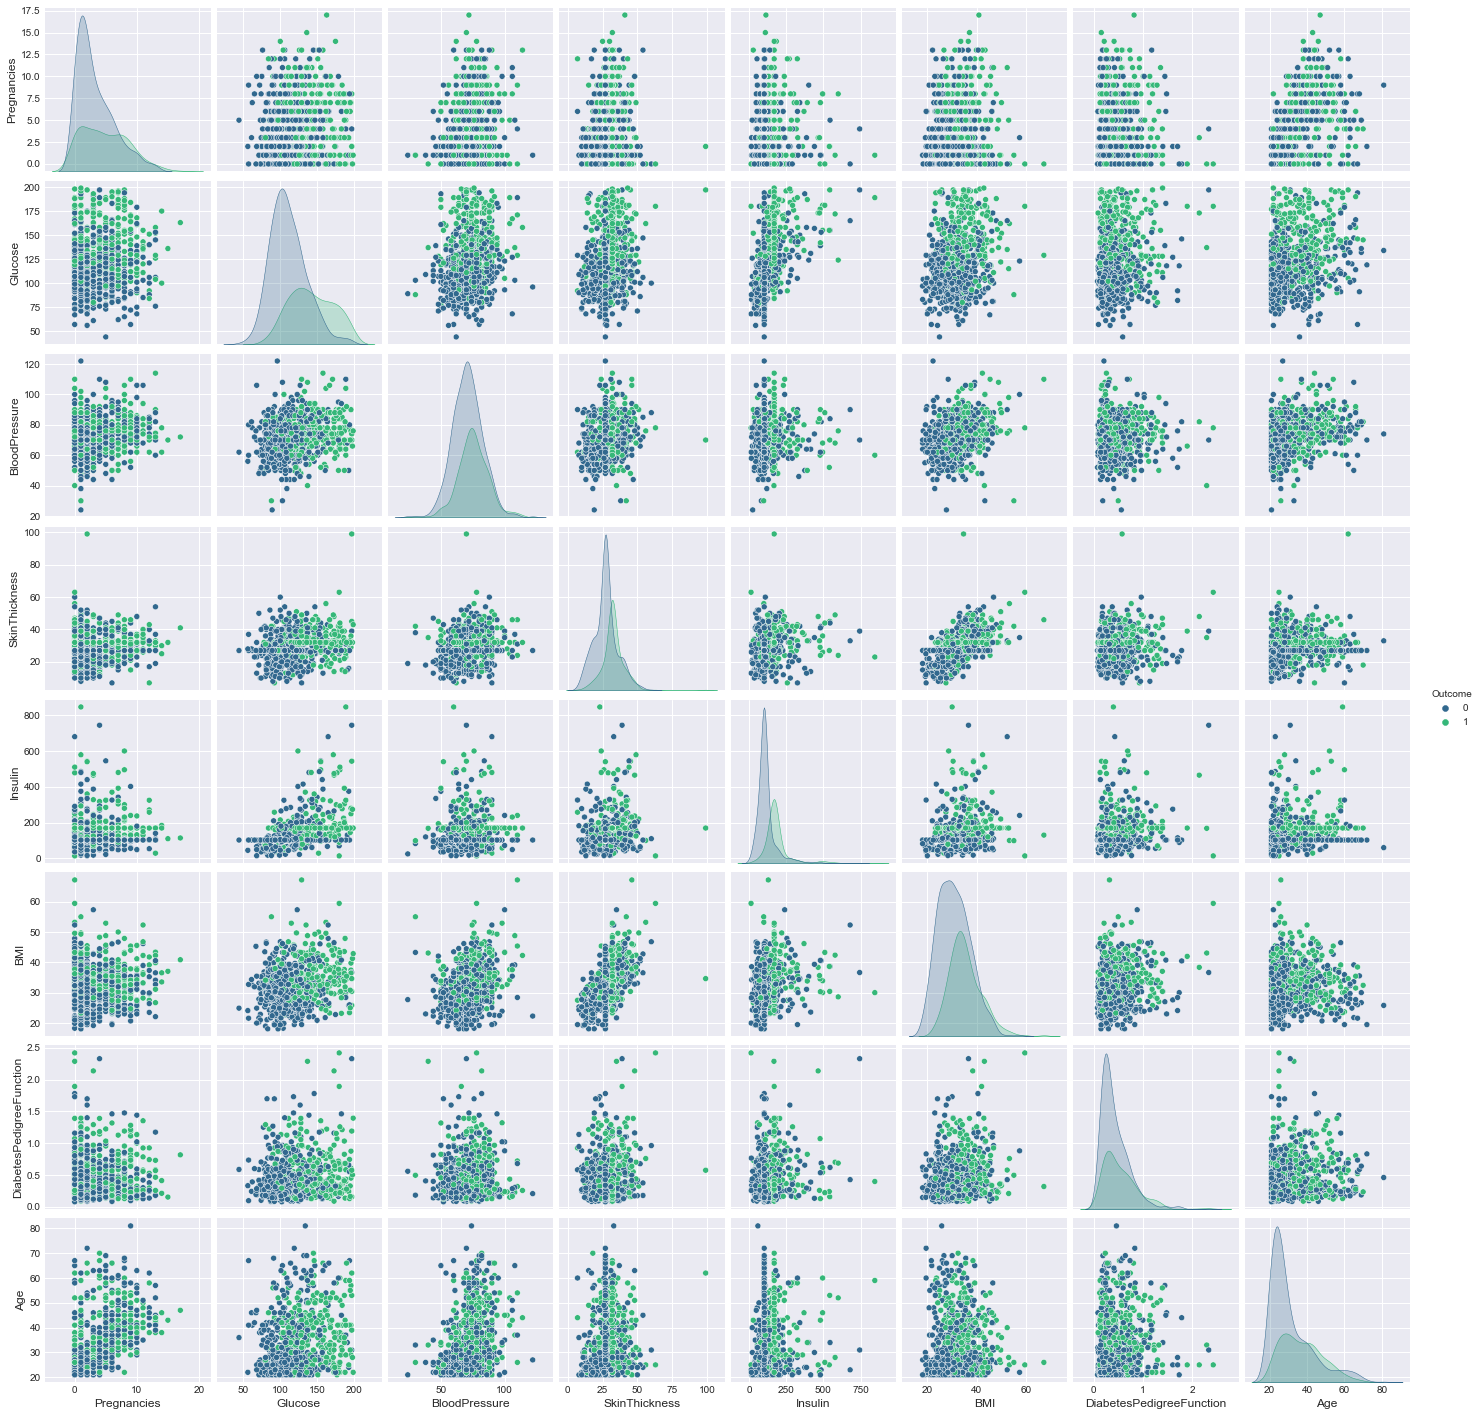

In [496]:
sb.pairplot(data,hue='Outcome',kind='scatter',diag_kind='kde',palette='viridis')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

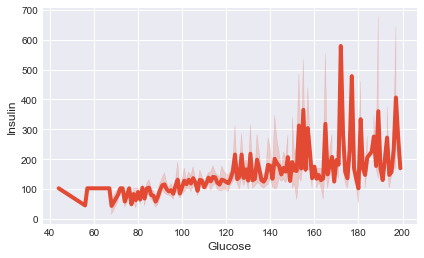

In [497]:
sb.lineplot(x='Glucose', y= 'Insulin', data=data)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

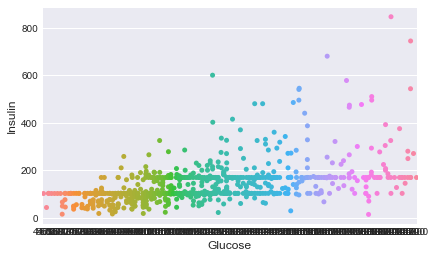

In [498]:
sb.stripplot(x='Glucose', y= 'Insulin', data=data,jitter=True)

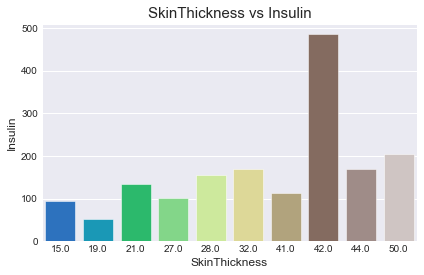

In [499]:
sb.barplot(x="SkinThickness", y="Insulin", data=data[150:160],palette='terrain')
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("fivethirtyeight")

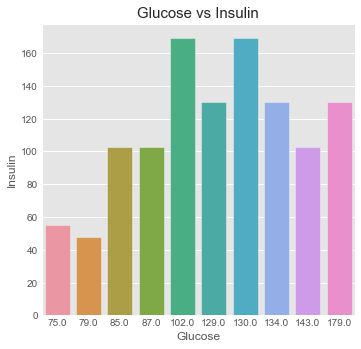

In [500]:
plt.style.use("ggplot")
plt.figure(figsize=(5,5))
sb.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

In [501]:
x = data.drop(columns = 'Outcome')
y = data['Outcome']
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [502]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

537
231
537
231


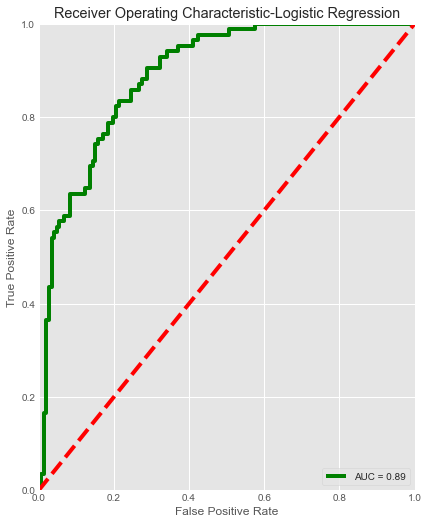

In [588]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
#probs = logreg.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.subplots(1, figsize=(6,8))
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic-Logistic Regression')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f'% roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [580]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
logreg=LogisticRegression(max_iter=200)
logreg.fit(x_train, y_train)

x_train_pred=logreg.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=logreg.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,preds))

76.53631284916202
80.95238095238095
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.81      0.64      0.71        85

    accuracy                           0.81       231
   macro avg       0.81      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231

[[133  13]
 [ 31  54]]
0.8917808219178082


In [556]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

x_train_pred=knn.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

92.36499068901304
85.28138528138528
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       146
           1       0.84      0.74      0.79        85

    accuracy                           0.85       231
   macro avg       0.85      0.83      0.84       231
weighted avg       0.85      0.85      0.85       231

[[134  12]
 [ 22  63]]
0.8917808219178082


In [559]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
svm = SVC(kernel='linear', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

x_train_pred=svm.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

77.83985102420856
80.95238095238095
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.81      0.64      0.71        85

    accuracy                           0.81       231
   macro avg       0.81      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231

[[133  13]
 [ 31  54]]


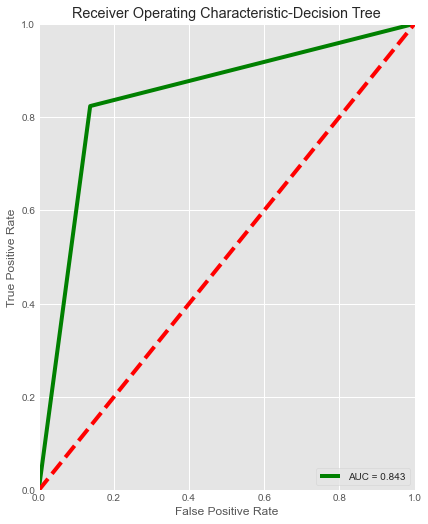

In [592]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = decision_tree.predict_proba(x_test)
preds = probs[:,1]
#probs = decision_tree.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.subplots(1, figsize=(6,8))
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic-Decision Tree')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.3f'% roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [594]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train, y_train)

x_train_pred=decision_tree.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=decision_tree.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,preds))

100.0
84.84848484848484
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       146
           1       0.78      0.81      0.80        85

    accuracy                           0.85       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.85      0.85      0.85       231

[[127  19]
 [ 16  69]]
0.8432715551974215


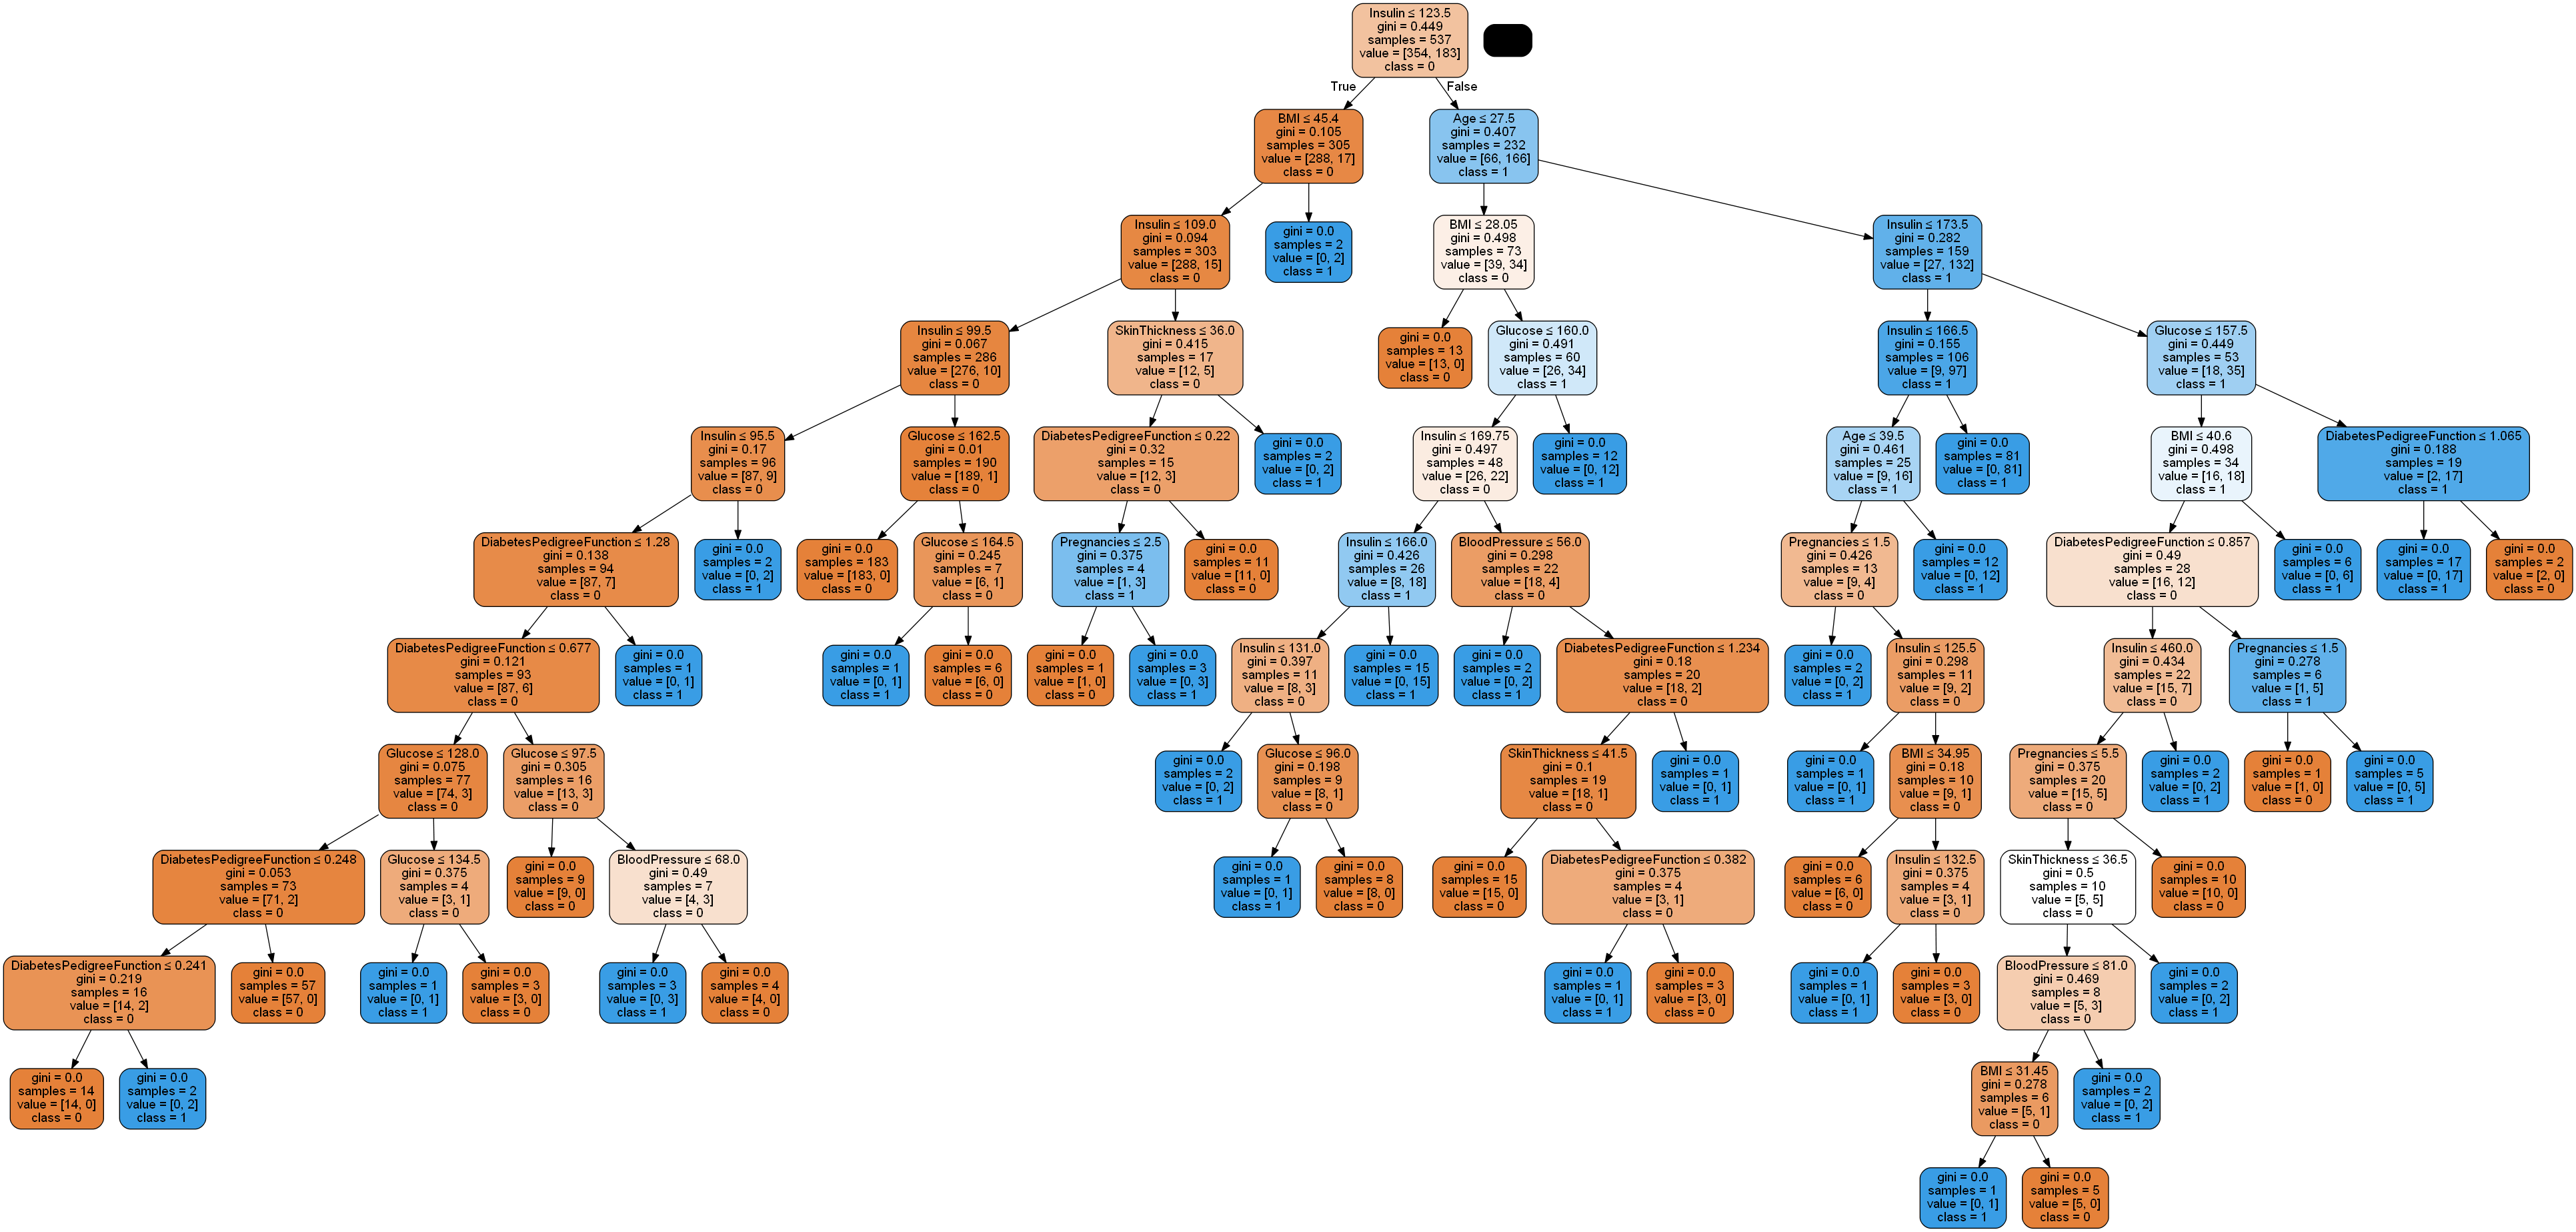

In [507]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names =feature_cols ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())


In [561]:
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
xgb_clf = xgb.XGBClassifier(use_label_encoder=False)
xgb_clf = xgb_clf.fit(x_train, y_train)

x_train_pred=xgb_clf.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=xgb_clf.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[00:44:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
100.0
87.87878787878788
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       146
           1       0.84      0.84      0.84        85

    accuracy                           0.88       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.88      0.88      0.88       231

[[132  14]
 [ 14  71]]


In [562]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
GNB = GaussianNB()
GNB.fit(x_train, y_train)

x_train_pred=GNB.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=GNB.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

75.79143389199255
80.08658008658008
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.75      0.69      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231

[[126  20]
 [ 26  59]]


In [563]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

x_train_pred=adb.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=adb.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

92.36499068901304
88.31168831168831
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       146
           1       0.83      0.86      0.84        85

    accuracy                           0.88       231
   macro avg       0.87      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

[[131  15]
 [ 12  73]]


In [564]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

x_train_pred=gbc.predict(x_train)
print(accuracy_score(x_train_pred,y_train))

y_pred=gbc.predict(x_test)
print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9869646182495344
0.9047619047619048
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       146
           1       0.88      0.86      0.87        85

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

[[136  10]
 [ 12  73]]


In [565]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

x_train_pred=etc.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=etc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

100.0
90.04329004329004
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       146
           1       0.90      0.82      0.86        85

    accuracy                           0.90       231
   macro avg       0.90      0.88      0.89       231
weighted avg       0.90      0.90      0.90       231

[[138   8]
 [ 15  70]]


In [566]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
random = RandomForestClassifier(random_state=0)
random.fit(x_train,y_train)

x_train_pred=random.predict(x_train)
print(accuracy_score(x_train_pred,y_train)*100)

y_pred=random.predict(x_test)
print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

100.0
0.8961038961038961
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       146
           1       0.89      0.82      0.85        85

    accuracy                           0.90       231
   macro avg       0.89      0.88      0.89       231
weighted avg       0.90      0.90      0.90       231

[[137   9]
 [ 15  70]]


In [600]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(random,x_train,y_train,cv=10)
print(score)
score.mean()

[0.83333333 0.81481481 0.88888889 0.88888889 0.85185185 0.94444444
 0.87037037 0.8490566  0.8490566  0.88679245]


0.8677498252969951

In [516]:
input=(3,78,50,32,88,31,0.248,26)
input_array=np.asarray(input)
input_reshape=input_array.reshape(1,-1)
prediction=logreg.predict(input_reshape)
print(prediction)
prediction=knn.predict(input_reshape)
print(prediction)
prediction=svm.predict(input_reshape)
print(prediction)
prediction=decision_tree.predict(input_reshape)
print(prediction)
prediction=xgb_clf.predict(input_reshape)
print(prediction)
prediction=GNB.predict(input_reshape)
print(prediction)
prediction=adb.predict(input_reshape)
print(prediction)
prediction=gbc.predict(input_reshape)
print(prediction)
prediction=etc.predict(input_reshape)
print(prediction)
prediction=random.predict(input_reshape)
print(prediction)


[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]


In [517]:
input=(4,110,92,0,0,37.6,0.191,30)
input_array=np.asarray(input)
input_reshape=input_array.reshape(1,-1)
prediction=logreg.predict(input_reshape)
print(prediction)
prediction=knn.predict(input_reshape)
print(prediction)
prediction=svm.predict(input_reshape)
print(prediction)
prediction=decision_tree.predict(input_reshape)
print(prediction)
prediction=xgb_clf.predict(input_reshape)
print(prediction)
prediction=GNB.predict(input_reshape)
print(prediction)
prediction=adb.predict(input_reshape)
print(prediction)
prediction=gbc.predict(input_reshape)
print(prediction)
prediction=etc.predict(input_reshape)
print(prediction)
prediction=random.predict(input_reshape)
print(prediction)

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
